In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Person ID: An identifier for each individual.

Gender: The gender of the person (Male/Female).

Age: The age of the person in years.

Occupation: The occupation or profession of the person.

Sleep Duration (hours): The number of hours the person sleeps per day.

Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.

Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.

Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).

Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

Heart Rate (bpm): The resting heart rate of the person in beats per minute.

Daily Steps: The number of steps the person takes per day.

Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


array([[<Axes: title={'center': 'Person ID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>],
       [<Axes: title={'center': 'Quality of Sleep'}>,
        <Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>],
       [<Axes: title={'center': 'Heart Rate'}>,
        <Axes: title={'center': 'Daily Steps'}>, <Axes: >]], dtype=object)

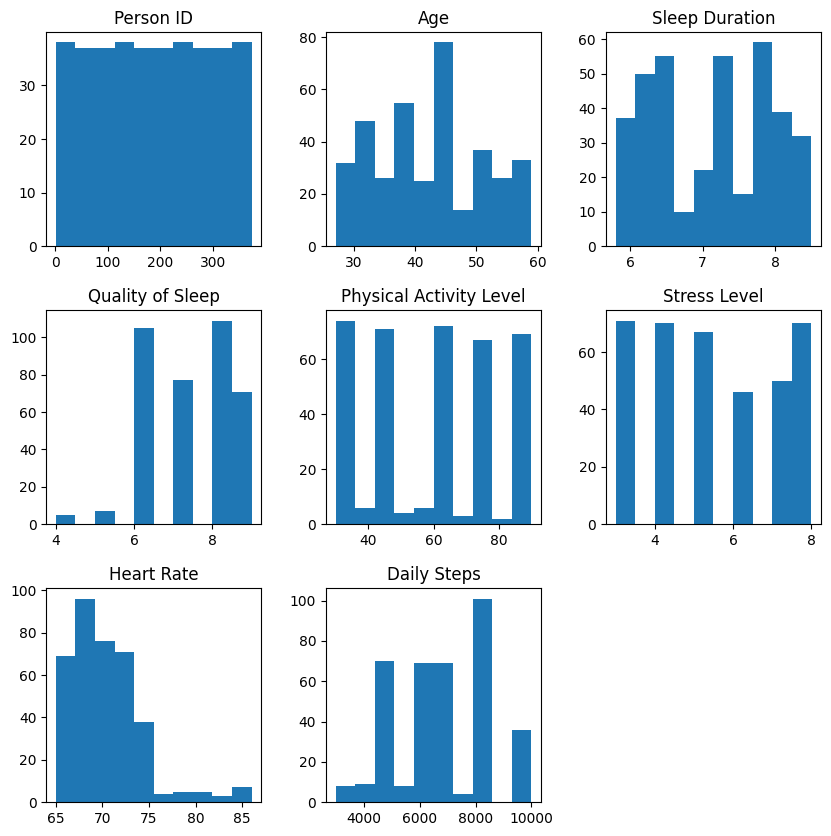

In [ ]:
df.hist(figsize=(10,10),grid=False)

In [7]:
df_modified = df.copy()

In [8]:
df_modified.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [9]:
df_modified['Sleep Disorder'].fillna('No', inplace=True)

Переводим из категориальных значений в численные

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [11]:
categorial_colomns = []
for col in df_modified.columns:
  if df_modified[col].dtypes == 'object':
    categorial_colomns.append(col)

print(categorial_colomns)

['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


In [15]:
for col in categorial_colomns:
  df_modified.loc[:, col] = label_encoder.fit_transform(df_modified[col])

In [16]:
df_modified

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,3,11,77,4200,1
1,2,1,28,1,6.2,6,60,8,0,9,75,10000,1
2,3,1,28,1,6.2,6,60,8,0,9,75,10000,1
3,4,1,28,6,5.9,4,30,8,2,22,85,3000,2
4,5,1,28,6,5.9,4,30,8,2,22,85,3000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,5,8.1,9,75,3,3,23,68,7000,2
370,371,0,59,5,8.0,9,75,3,3,23,68,7000,2
371,372,0,59,5,8.1,9,75,3,3,23,68,7000,2
372,373,0,59,5,8.1,9,75,3,3,23,68,7000,2


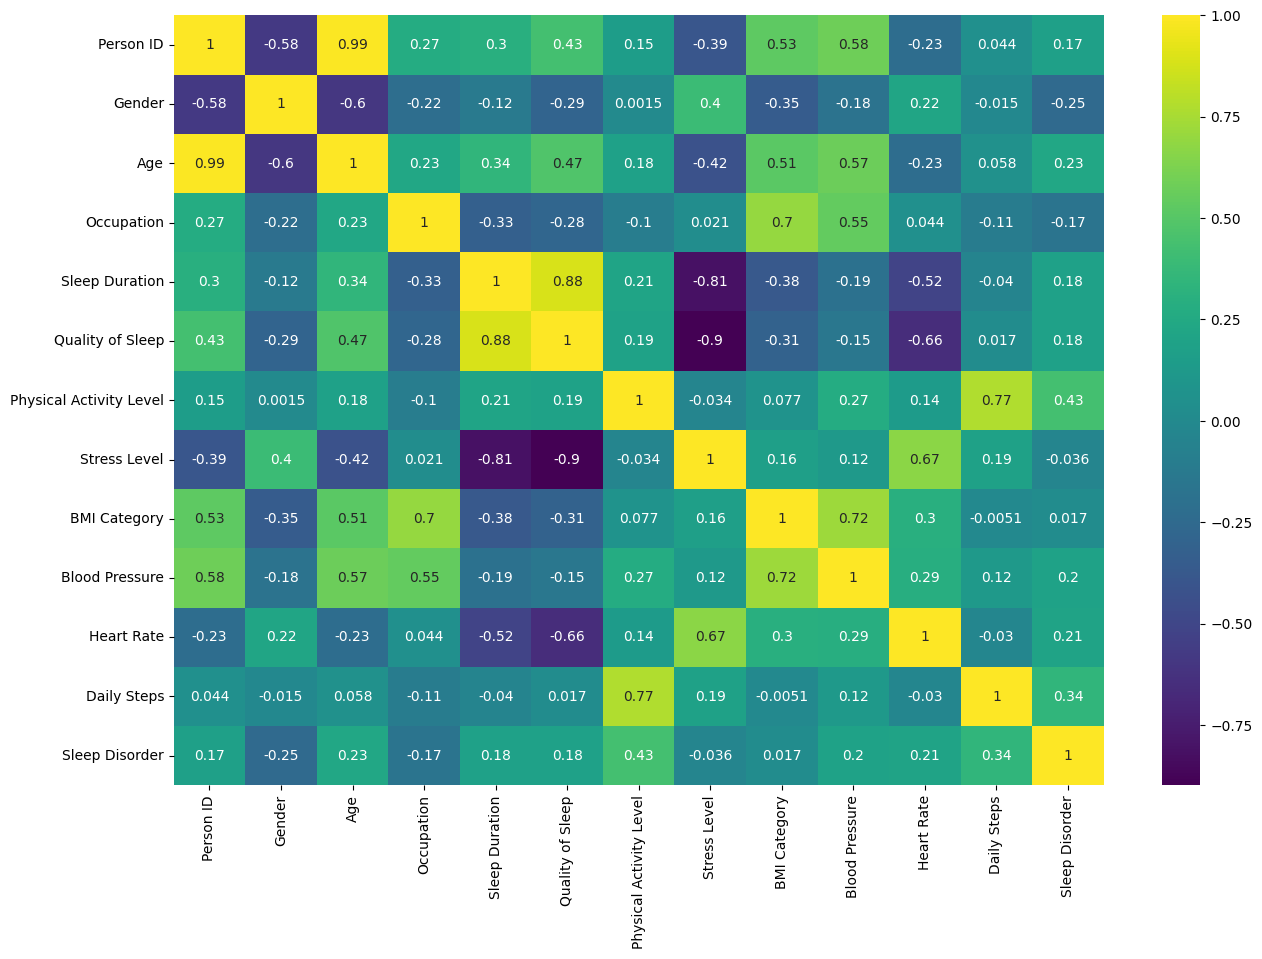

In [17]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(df_modified.corr(), cmap='viridis', annot=True)

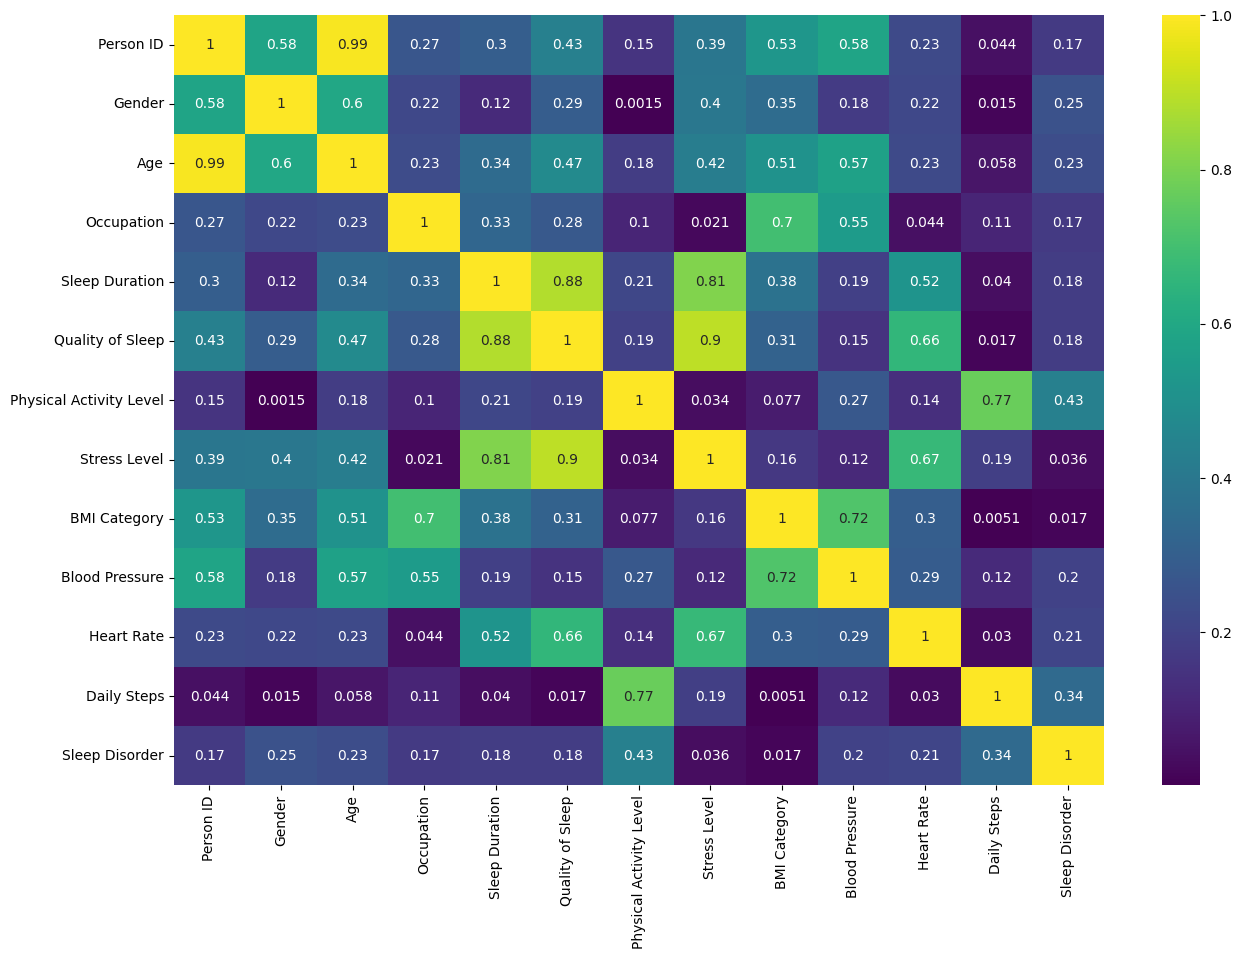

In [18]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(df_modified.corr().abs(), cmap='viridis', annot=True)

Text(0.5, 1.0, 'Распределение Sleep Duration')

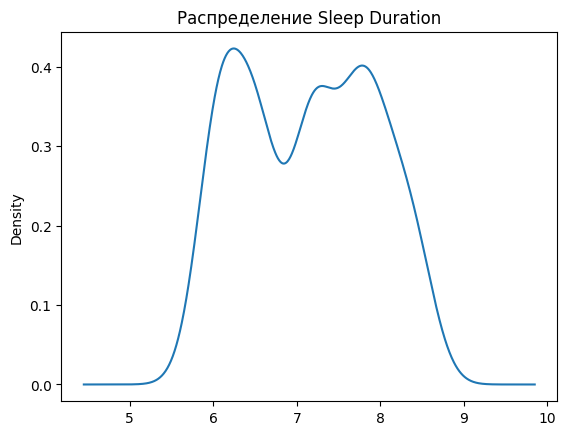

In [26]:
df_modified['Sleep Duration'].plot(kind='kde')
plt.title("Распределение Sleep Duration")

Text(0.5, 1.0, 'Распределение Quality of Sleep')

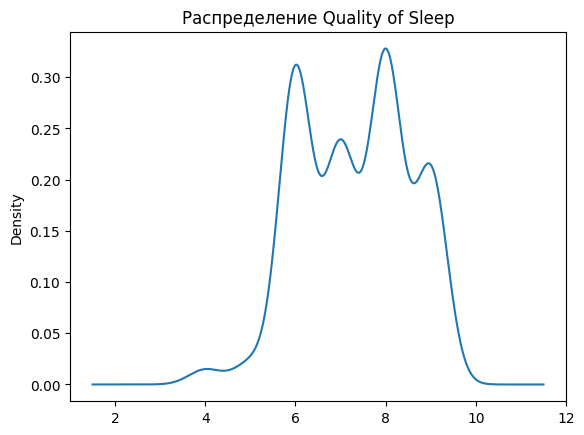

In [27]:
df_modified['Quality of Sleep'].plot(kind='kde')
plt.title("Распределение Quality of Sleep")

In [85]:
df_modified['Sleep Disorder'].unique()

array([1, 2, 0])

И так мы будем решать задачу регрессии для Sleep Duration, поэтому уберем сильно корелирующий признак Quality of Sleep

Для задачи классификации будем определять диагноз Sleep Disorder

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, mean_absolute_error

from sklearn.svm import SVR

from sklearn.svm import SVC

# **Линейная регрессия**

In [21]:
df_reg = df_modified.copy()
df_reg = df_reg.drop(['Quality of Sleep'], axis = 1)

In [46]:
X = df_reg.drop(['Sleep Duration'], axis = 1)
y = df_reg['Sleep Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

MAE(train): 0.2254800878085561
MAE(test): 0.23230165602971678


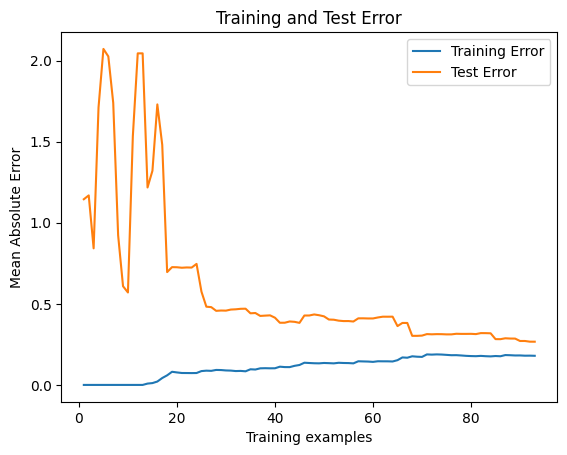

In [48]:
train_errors = []
test_errors = []

for i in range(1, len(X_test)):
    model.fit(X_train[:i], y_train[:i])
    train_pred = model.predict(X_train[:i])
    train_errors.append(mean_absolute_error(y_train[:i], train_pred))
    test_pred = model.predict(X_test)
    test_errors.append(mean_absolute_error(y_test, test_pred))

plt.plot(range(1, len(X_test)), train_errors, label='Training Error')
plt.plot(range(1, len(X_test)), test_errors, label='Test Error')
plt.xlabel('Training examples')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Test Error')
plt.legend()
plt.show()

# **Логистическая регрессия**

In [ ]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [49]:
df_modified['Sleep Disorder'] = df_modified['Sleep Disorder'].astype(int)

In [119]:
X = df_modified.drop(['Sleep Disorder'], axis = 1)
y = df_modified['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [121]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy(train) = {accuracy}')
print(f'F1: {f1_score(y_train, y_pred, average=None)}')
matrix = confusion_matrix(y_train, y_pred)
print(f'Matrix:\n{matrix}\n')

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy(test) = {accuracy}')
print(f'F1: {f1_score(y_test, y_pred, average=None)}')
matrix = confusion_matrix(y_test, y_pred)
print(f'Matrix:\n{matrix}')



Accuracy(train) = 0.9
F1: [0.82142857 0.94642857 0.83928571]
Matrix:
[[ 46   5   3]
 [  5 159   5]
 [  7   3  47]]

Accuracy(test) = 0.8829787234042553
F1: [0.83333333 0.92       0.85      ]
Matrix:
[[20  2  1]
 [ 3 46  1]
 [ 2  2 17]]


# **SVM**

Регрессия

In [74]:
X = df_reg.drop(['Sleep Duration'], axis = 1)
y = df_reg['Sleep Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [75]:
model = SVR(kernel = 'rbf', C=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')


MAE(train): 0.4514634306687941
MAE(test): 0.4812915844335788


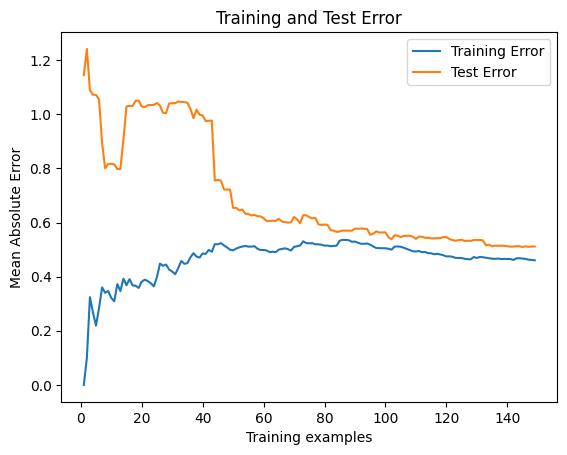

In [77]:
train_errors = []
test_errors = []

for i in range(1, 150):
    model.fit(X_train[:i], y_train[:i])
    train_pred = model.predict(X_train[:i])
    train_errors.append(mean_absolute_error(y_train[:i], train_pred))
    test_pred = model.predict(X_test)
    test_errors.append(mean_absolute_error(y_test, test_pred))

plt.plot(range(1, 150), train_errors, label='Training Error')
plt.plot(range(1, 150), test_errors, label='Test Error')
plt.xlabel('Training examples')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Test Error')
plt.legend()
plt.show()

Классификация

In [78]:
X = df_modified.drop(['Sleep Disorder'], axis = 1)
y = df_modified['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [86]:
model = SVC(kernel = 'rbf',C=1200)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy(train) = {accuracy}')
print(f'F1: {f1_score(y_train, y_pred, average=None)}')
matrix = confusion_matrix(y_train, y_pred)
print(f'Matrix:\n{matrix}\n')

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy(test) = {accuracy}')
print(f'F1: {f1_score(y_test, y_pred, average=None)}')
matrix = confusion_matrix(y_test, y_pred)
print(f'Matrix:\n{matrix}')


Accuracy(train) = 0.875
F1: [0.81818182 0.90855457 0.82882883]
Matrix:
[[ 45   7   2]
 [  9 154   6]
 [  2   9  46]]

Accuracy(test) = 0.8404255319148937
F1: [0.76595745 0.88888889 0.80952381]
Matrix:
[[18  2  3]
 [ 5 44  1]
 [ 1  3 17]]


## **Нейросети**

In [89]:
import tensorflow as tf
from tensorflow.keras import layers

# **Просто нейросеть**

Регрессия

In [90]:
X  = df_reg.drop(['Sleep Duration'], axis = 1)
y = df_reg['Sleep Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [91]:
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float64)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float64)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float64)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.float64)

In [92]:
input_shape = (X_train.shape[1],)
model = tf.keras.Sequential([

        tf.keras.layers.Dense(units=15, activation='tanh', input_shape=input_shape),
        tf.keras.layers.Dense(units=12, activation='tanh'),
        tf.keras.layers.Dense(units=1)
])

In [97]:
model.compile(optimizer='adam',loss='mae')
loss=model.fit(X_train_tf, y_train_tf, epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 4ms/step - loss: 0.6763
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6726
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6717
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6801
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6745
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6716
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6782
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6728
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6732
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6732
Epoch 11/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6745
Epoch 12/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6716
Epoch 13/100
9/9 [==============================] - 0s 4ms/st

Text(0.5, 1.0, 'loss history')

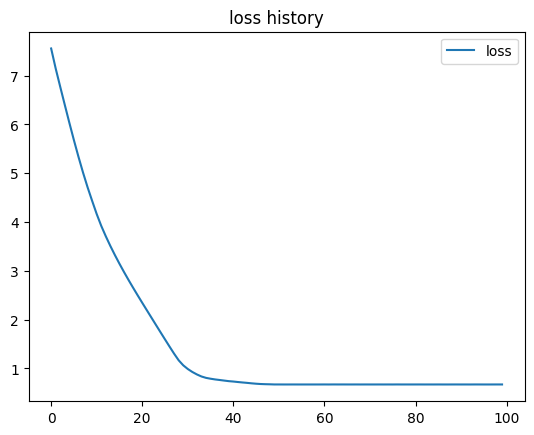

In [94]:
loss_df = pd.DataFrame(loss.history)
loss_df.loc[:,['loss']].plot()
plt.title('loss history')

In [99]:
y_pred = model.predict(X_test_tf)
print(mean_absolute_error(y_test_tf,y_pred))

3/3 [==============================] - 0s 4ms/step
0.7395586622522232


In [95]:
model = tf.keras.Sequential([

        tf.keras.layers.Dense(units=100, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(units=100, activation='tanh'),
        tf.keras.layers.Dense(units=1)
])
model.compile(optimizer='adam',loss='mae')
loss=model.fit(X_train_tf, y_train_tf, epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 3ms/step - loss: 4.1284
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 3.1866
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 2.2780
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 1.3791
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.8176
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6838
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.7038
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6978
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6736
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6738
Epoch 11/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6704
Epoch 12/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6717
Epoch 13/100
9/9 [==============================] - 0s 3ms/st

Text(0.5, 1.0, 'loss history')

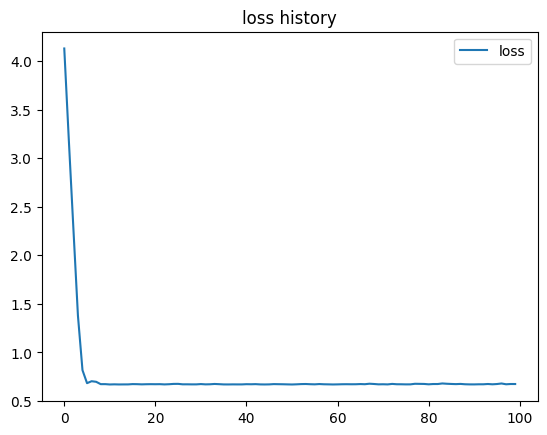

In [96]:
loss_df = pd.DataFrame(loss.history)
loss_df.loc[:,['loss']].plot()
plt.title('loss history')

Классифкация

In [100]:
X = df_modified.drop(['Sleep Disorder'], axis = 1)
y = df_modified['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [101]:
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float64)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float64)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float64)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.float64)

In [102]:
input_shape = (X_train.shape[1],)
model = tf.keras.Sequential([

        tf.keras.layers.Dense(units=13, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(units=13, activation='tanh'),
        tf.keras.layers.Dense(units=3, activation='softmax')
])

In [103]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
loss=model.fit(X_train_tf, y_train_tf, epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 2ms/step - loss: 1.1531 - accuracy: 0.2143
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 1.0505 - accuracy: 0.5036
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 1.0114 - accuracy: 0.6036
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9865 - accuracy: 0.6036
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.9711 - accuracy: 0.6036
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9605 - accuracy: 0.6036
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9543 - accuracy: 0.6036
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9509 - accuracy: 0.6036
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9493 - accuracy: 0.6036
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9478 - accuracy: 0.6036
Epoch 11/100
9/9 [===========

In [104]:
y_pred_probability = model.predict(X_train_tf)
y_pred = np.argmax(y_pred_probability, axis=1)

accuracy = accuracy_score(y_train_tf, y_pred)
print(f'Accuracy = {accuracy}')
print(f'F1: {f1_score(y_train_tf, y_pred, average=None)}')
matrix = confusion_matrix(y_train_tf, y_pred)
print(f'Matrix:\n{matrix}\n')

y_pred_probability = model.predict(X_test_tf)
y_pred = np.argmax(y_pred_probability, axis=1)

accuracy = accuracy_score(y_test_tf, y_pred)
print(f'Accuracy = {accuracy}')
print(f'F1: {f1_score(y_test_tf, y_pred, average=None)}')
matrix = confusion_matrix(y_test_tf, y_pred)
print(f'Matrix:\n{matrix}\n')

9/9 [==============================] - 0s 2ms/step
Accuracy = 0.6035714285714285
F1: [0.         0.75278396 0.        ]
Matrix:
[[  0  54   0]
 [  0 169   0]
 [  0  57   0]]

3/3 [==============================] - 0s 6ms/step
Accuracy = 0.5319148936170213
F1: [0.         0.69444444 0.        ]
Matrix:
[[ 0 23  0]
 [ 0 50  0]
 [ 0 21  0]]



In [114]:
model = tf.keras.Sequential([

        tf.keras.layers.Dense(units=150, activation='tanh', input_shape=input_shape),
        tf.keras.layers.Dense(units=150, activation='tanh'),
        tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
loss=model.fit(X_train_tf, y_train_tf, epochs=300)



Epoch 1/300
9/9 [==============================] - 1s 5ms/step - loss: 1.2243 - accuracy: 0.5393
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 1.0920 - accuracy: 0.4321
Epoch 3/300
9/9 [==============================] - 0s 4ms/step - loss: 0.9841 - accuracy: 0.5500
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 0.9270 - accuracy: 0.5964
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 0.9774 - accuracy: 0.5536
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 0.9082 - accuracy: 0.5893
Epoch 7/300
9/9 [==============================] - 0s 5ms/step - loss: 0.9370 - accuracy: 0.6250
Epoch 8/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8513 - accuracy: 0.6036
Epoch 9/300
9/9 [==============================] - 0s 4ms/step - loss: 0.9719 - accuracy: 0.5214
Epoch 10/300
9/9 [==============================] - 0s 4ms/step - loss: 0.8650 - accuracy: 0.5929
Epoch 11/300
9/9 [===========

In [115]:
y_pred_probability = model.predict(X_train_tf)
y_pred = np.argmax(y_pred_probability, axis=1)

accuracy = accuracy_score(y_train_tf, y_pred)
print(f'Accuracy = {accuracy}')
print(f'F1: {f1_score(y_train_tf, y_pred, average=None)}')
matrix = confusion_matrix(y_train_tf, y_pred)
print(f'Matrix:\n{matrix}\n')

y_pred_probability = model.predict(X_test_tf)
y_pred = np.argmax(y_pred_probability, axis=1)

accuracy = accuracy_score(y_test_tf, y_pred)
print(f'Accuracy = {accuracy}')
print(f'F1: {f1_score(y_test_tf, y_pred, average=None)}')
matrix = confusion_matrix(y_test_tf, y_pred)
print(f'Matrix:\n{matrix}\n')

9/9 [==============================] - 0s 2ms/step
Accuracy = 0.6464285714285715
F1: [0.56097561 0.79646018 0.        ]
Matrix:
[[ 46   8   0]
 [ 34 135   0]
 [ 30  27   0]]

3/3 [==============================] - 0s 4ms/step
Accuracy = 0.6914893617021277
F1: [0.70967742 0.81904762 0.        ]
Matrix:
[[22  1  0]
 [ 7 43  0]
 [10 11  0]]



# **Деревья решений**

In [173]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV

Классификация

In [150]:
X = df_modified.drop(['Sleep Disorder'], axis = 1)
y = df_modified['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [135]:
model = DecisionTreeClassifier()

#criterion - Критерий разделения
#max_depth - Максімальная глубина
#min_samples_split - Минимальное к-во образцов для разделения
#min_samples_leaf - Минимально к-во образцов в листе

param = { 'criterion': ['entropy', 'gini'],
          'max_depth': range(3,15),
          'min_samples_leaf': range(1, 15),
          'min_samples_split': range(2,15),
        }

param_of_tree = GridSearchCV(estimator=model, param_grid = param)
param_of_tree.fit(X_train, y_train)
print(param_of_tree.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [152]:
model = DecisionTreeClassifier(criterion='gini',
                               max_depth=4,
                               min_samples_split=4,
                               min_samples_leaf=1,
                               random_state = 0)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=4, random_state=0)

In [153]:
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy(train) = {accuracy}')
print(f'F1: {f1_score(y_train, y_pred, average=None)}')
matrix = confusion_matrix(y_train, y_pred)
print(f'Matrix:\n{matrix}\n')

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy(test) = {accuracy}')
print(f'F1: {f1_score(y_test, y_pred, average=None)}')
matrix = confusion_matrix(y_test, y_pred)
print(f'Matrix:\n{matrix}')


Accuracy(train) = 0.925
F1: [0.87378641 0.95266272 0.8907563 ]
Matrix:
[[ 45   5   4]
 [  3 161   5]
 [  1   3  53]]

Accuracy(test) = 0.8936170212765957
F1: [0.82608696 0.93069307 0.87804878]
Matrix:
[[19  2  2]
 [ 3 47  0]
 [ 1  2 18]]


[Text(0.5217391304347826, 0.9, 'x[8] <= 1.5\ngini = 0.557\nsamples = 280\nvalue = [54, 169, 57]'),
 Text(0.2826086956521739, 0.7, 'x[10] <= 76.5\ngini = 0.135\nsamples = 168\nvalue = [7, 156, 5]'),
 Text(0.17391304347826086, 0.5, 'x[6] <= 85.0\ngini = 0.094\nsamples = 164\nvalue = [5, 156, 3]'),
 Text(0.08695652173913043, 0.3, 'x[4] <= 6.05\ngini = 0.058\nsamples = 136\nvalue = [2, 132, 2]'),
 Text(0.043478260869565216, 0.1, 'gini = 0.34\nsamples = 10\nvalue = [1, 8, 1]'),
 Text(0.13043478260869565, 0.1, 'gini = 0.031\nsamples = 126\nvalue = [1, 124, 1]'),
 Text(0.2608695652173913, 0.3, 'x[0] <= 218.5\ngini = 0.253\nsamples = 28\nvalue = [3, 24, 1]'),
 Text(0.21739130434782608, 0.1, 'gini = 0.204\nsamples = 26\nvalue = [3, 23, 0]'),
 Text(0.30434782608695654, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.391304347826087, 0.5, 'x[0] <= 18.0\ngini = 0.5\nsamples = 4\nvalue = [2, 0, 2]'),
 Text(0.34782608695652173, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.

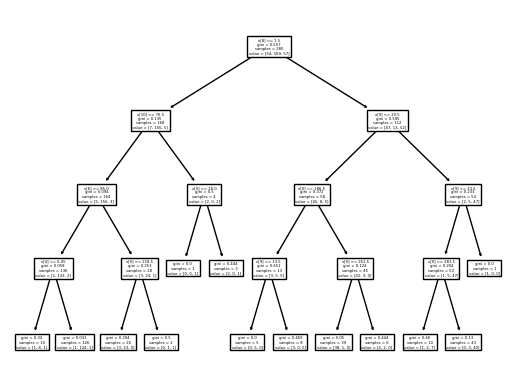

In [145]:
plot_tree(model)

In [154]:
model = DecisionTreeClassifier(criterion='entropy',
                               max_depth=4,
                               min_samples_split=4,
                               min_samples_leaf=1,
                               random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy(train) = {accuracy}')
print(f'F1: {f1_score(y_train, y_pred, average=None)}')
matrix = confusion_matrix(y_train, y_pred)
print(f'Matrix:\n{matrix}\n')

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy(test) = {accuracy}')
print(f'F1: {f1_score(y_test, y_pred, average=None)}')
matrix = confusion_matrix(y_test, y_pred)
print(f'Matrix:\n{matrix}')


Accuracy(train) = 0.925
F1: [0.86538462 0.95266272 0.89830508]
Matrix:
[[ 45   5   4]
 [  4 161   4]
 [  1   3  53]]

Accuracy(test) = 0.8829787234042553
F1: [0.8        0.93069307 0.85714286]
Matrix:
[[18  2  3]
 [ 3 47  0]
 [ 1  2 18]]


C Gini лучше опеределяет

Регрессия

In [174]:
X  = df_reg.drop(['Sleep Duration'], axis = 1)
y = df_reg['Sleep Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [176]:
model = DecisionTreeRegressor()

param = { 'criterion': ['squared_error', 'absolute_error'],
          'max_depth': range(3,15),
          'min_samples_leaf': range(1, 15),
          'min_samples_split': range(2,15),
        }

param_of_tree = GridSearchCV(estimator=model, param_grid = param)
param_of_tree.fit(X_train, y_train)
print(param_of_tree.best_params_)

{'criterion': 'squared_error', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 7}


In [179]:
model = DecisionTreeRegressor(criterion='squared_error',
                               max_depth=15,
                               min_samples_split=7,
                               min_samples_leaf=1,
                               random_state = 0)

model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_split=7, random_state=0)

In [180]:
y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

MAE(train): 0.02153571428571451
MAE(test): 0.060992907801418465


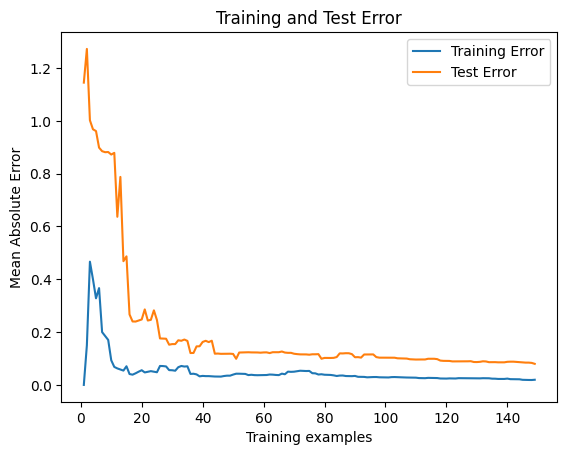

In [181]:
train_errors = []
test_errors = []

for i in range(1, 150):
    model.fit(X_train[:i], y_train[:i])
    train_pred = model.predict(X_train[:i])
    train_errors.append(mean_absolute_error(y_train[:i], train_pred))
    test_pred = model.predict(X_test)
    test_errors.append(mean_absolute_error(y_test, test_pred))

plt.plot(range(1, 150), train_errors, label='Training Error')
plt.plot(range(1, 150), test_errors, label='Test Error')
plt.xlabel('Training examples')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Test Error')
plt.legend()
plt.show()

# **Случайный лес**

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

Классификация

In [155]:
X = df_modified.drop(['Sleep Disorder'], axis = 1)
y = df_modified['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [161]:
model = RandomForestClassifier(n_estimators=100,
                              criterion='gini',
                              max_depth=4,
                              min_samples_split=4,
                              min_samples_leaf=1,
                              random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy(train) = {accuracy}')
print(f'F1: {f1_score(y_train, y_pred, average=None)}')
matrix = confusion_matrix(y_train, y_pred)
print(f'Matrix:\n{matrix}\n')

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy(test) = {accuracy}')
print(f'F1: {f1_score(y_test, y_pred, average=None)}')
matrix = confusion_matrix(y_test, y_pred)
print(f'Matrix:\n{matrix}')

Accuracy(train) = 0.9321428571428572
F1: [0.89320388 0.95266272 0.90756303]
Matrix:
[[ 46   5   3]
 [  3 161   5]
 [  0   3  54]]

Accuracy(test) = 0.9042553191489362
F1: [0.8372093  0.95145631 0.85714286]
Matrix:
[[18  2  3]
 [ 1 49  0]
 [ 1  2 18]]


In [162]:
model = RandomForestClassifier(n_estimators=100,
                              criterion='entropy',
                              max_depth=4,
                              min_samples_split=4,
                              min_samples_leaf=1,
                              random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy(train) = {accuracy}')
print(f'F1: {f1_score(y_train, y_pred, average=None)}')
matrix = confusion_matrix(y_train, y_pred)
print(f'Matrix:\n{matrix}\n')

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy(test) = {accuracy}')
print(f'F1: {f1_score(y_test, y_pred, average=None)}')
matrix = confusion_matrix(y_test, y_pred)
print(f'Matrix:\n{matrix}')

Accuracy(train) = 0.9321428571428572
F1: [0.89320388 0.95266272 0.90756303]
Matrix:
[[ 46   5   3]
 [  3 161   5]
 [  0   3  54]]

Accuracy(test) = 0.9148936170212766
F1: [0.86363636 0.95145631 0.87804878]
Matrix:
[[19  2  2]
 [ 1 49  0]
 [ 1  2 18]]


Регрессия

In [182]:
X  = df_reg.drop(['Sleep Duration'], axis = 1)
y = df_reg['Sleep Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [183]:
model = RandomForestRegressor(n_estimators=100,
                              criterion='absolute_error',
                              max_depth=15,
                              min_samples_split=7,
                              min_samples_leaf=1,
                              random_state = 0)

model.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=15,
                      min_samples_split=7, random_state=0)

In [184]:
y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

MAE(train): 0.03953928571428597
MAE(test): 0.06751063829787213


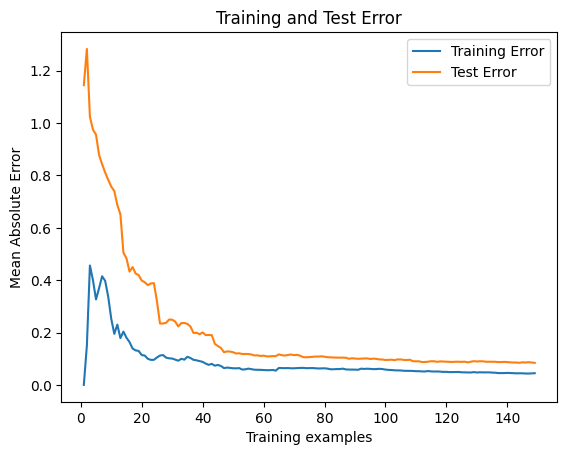

In [185]:
train_errors = []
test_errors = []

for i in range(1, 150):
    model.fit(X_train[:i], y_train[:i])
    train_pred = model.predict(X_train[:i])
    train_errors.append(mean_absolute_error(y_train[:i], train_pred))
    test_pred = model.predict(X_test)
    test_errors.append(mean_absolute_error(y_test, test_pred))

plt.plot(range(1, 150), train_errors, label='Training Error')
plt.plot(range(1, 150), test_errors, label='Test Error')
plt.xlabel('Training examples')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Test Error')
plt.legend()
plt.show()

In [186]:
model = RandomForestRegressor(n_estimators=100,
                              criterion='squared_error',
                              max_depth=15,
                              min_samples_split=7,
                              min_samples_leaf=1,
                              random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

MAE(train): 0.03710171977299048
MAE(test): 0.062214134978496545


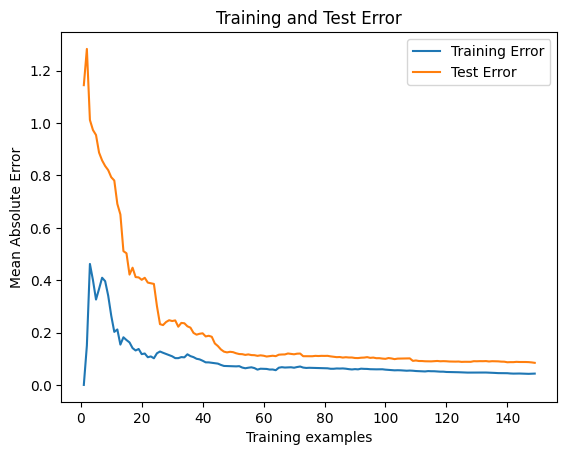

In [187]:
train_errors = []
test_errors = []

for i in range(1, 150):
    model.fit(X_train[:i], y_train[:i])
    train_pred = model.predict(X_train[:i])
    train_errors.append(mean_absolute_error(y_train[:i], train_pred))
    test_pred = model.predict(X_test)
    test_errors.append(mean_absolute_error(y_test, test_pred))

plt.plot(range(1, 150), train_errors, label='Training Error')
plt.plot(range(1, 150), test_errors, label='Test Error')
plt.xlabel('Training examples')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Test Error')
plt.legend()
plt.show()

Лучше показтель у энтропии(классификиция) и у mse(регрессия)

# **Градиентные бустинги**

**XGB**

In [203]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor

Классификация

In [189]:
X = df_modified.drop(['Sleep Disorder'], axis = 1)
y = df_modified['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [192]:
from sklearn.preprocessing import StandardScaler

In [193]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [201]:
model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy(train) = {accuracy}')
print(f'F1: {f1_score(y_train, y_pred, average=None)}')
matrix = confusion_matrix(y_train, y_pred)
print(f'Matrix:\n{matrix}\n')

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy(test) = {accuracy}')
print(f'F1: {f1_score(y_test, y_pred, average=None)}')
matrix = confusion_matrix(y_test, y_pred)
print(f'Matrix:\n{matrix}')

Accuracy(train) = 0.9964285714285714
F1: [1.         0.99705015 0.99115044]
Matrix:
[[ 54   0   0]
 [  0 169   0]
 [  0   1  56]]

Accuracy(test) = 0.9148936170212766
F1: [0.86363636 0.95145631 0.87804878]
Matrix:
[[19  2  2]
 [ 1 49  0]
 [ 1  2 18]]


In [202]:
model = XGBClassifier(n_estimators=50, max_depth=13, learning_rate=0.01)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy(train) = {accuracy}')
print(f'F1: {f1_score(y_train, y_pred, average=None)}')
matrix = confusion_matrix(y_train, y_pred)
print(f'Matrix:\n{matrix}\n')

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy(test) = {accuracy}')
print(f'F1: {f1_score(y_test, y_pred, average=None)}')
matrix = confusion_matrix(y_test, y_pred)
print(f'Matrix:\n{matrix}')

Accuracy(train) = 0.9464285714285714
F1: [0.92156863 0.96187683 0.92307692]
Matrix:
[[ 47   5   2]
 [  1 164   4]
 [  0   3  54]]

Accuracy(test) = 0.9148936170212766
F1: [0.86363636 0.95145631 0.87804878]
Matrix:
[[19  2  2]
 [ 1 49  0]
 [ 1  2 18]]


Регрессия

In [204]:
X  = df_reg.drop(['Sleep Duration'], axis = 1)
y = df_reg['Sleep Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [206]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [212]:
model = XGBRegressor(n_estimators=50, max_depth=8, learning_rate=0.01)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [213]:
y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

MAE(train): 0.4152786830493383
MAE(test): 0.4587988609963276


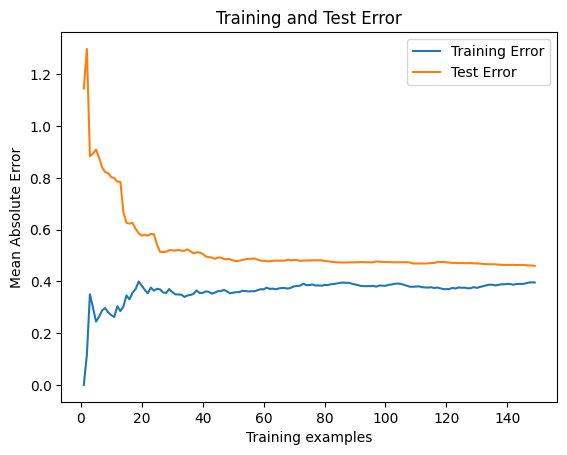

In [214]:
train_errors = []
test_errors = []

for i in range(1, 150):
    model.fit(X_train[:i], y_train[:i])
    train_pred = model.predict(X_train[:i])
    train_errors.append(mean_absolute_error(y_train[:i], train_pred))
    test_pred = model.predict(X_test)
    test_errors.append(mean_absolute_error(y_test, test_pred))

plt.plot(range(1, 150), train_errors, label='Training Error')
plt.plot(range(1, 150), test_errors, label='Test Error')
plt.xlabel('Training examples')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Test Error')
plt.legend()
plt.show()

MAE(train): 0.2623009218488421
MAE(test): 0.28896203243986096


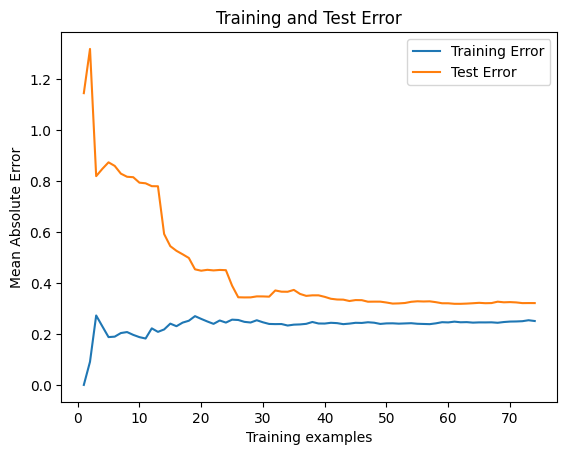

In [224]:
model = XGBRegressor( max_depth=5, learning_rate=0.01)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

train_errors = []
test_errors = []

for i in range(1, 75):
    model.fit(X_train[:i], y_train[:i])
    train_pred = model.predict(X_train[:i])
    train_errors.append(mean_absolute_error(y_train[:i], train_pred))
    test_pred = model.predict(X_test)
    test_errors.append(mean_absolute_error(y_test, test_pred))

plt.plot(range(1, 75), train_errors, label='Training Error')
plt.plot(range(1, 75), test_errors, label='Test Error')
plt.xlabel('Training examples')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Test Error')
plt.legend()
plt.show()

**CatBoost**

In [226]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.7 MB/s eta 0:00:00


In [232]:
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor

Классификация

In [228]:
X = df_modified.drop(['Sleep Disorder'], axis = 1)
y = df_modified['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [229]:
model = CatBoostClassifier(depth=8, learning_rate=0.1)
model.fit(X_train, y_train)

0:	learn: 0.9894002	total: 99.3ms	remaining: 1m 39s
1:	learn: 0.9015583	total: 113ms	remaining: 56.2s
2:	learn: 0.8294296	total: 153ms	remaining: 50.9s
3:	learn: 0.7722651	total: 181ms	remaining: 45.1s
4:	learn: 0.7209587	total: 211ms	remaining: 41.9s
5:	learn: 0.6728247	total: 220ms	remaining: 36.4s
6:	learn: 0.6306666	total: 235ms	remaining: 33.3s
7:	learn: 0.5932595	total: 244ms	remaining: 30.3s
8:	learn: 0.5648788	total: 253ms	remaining: 27.9s
9:	learn: 0.5366057	total: 289ms	remaining: 28.6s
10:	learn: 0.5128638	total: 302ms	remaining: 27.1s
11:	learn: 0.4918675	total: 308ms	remaining: 25.3s
12:	learn: 0.4733907	total: 315ms	remaining: 23.9s
13:	learn: 0.4561764	total: 321ms	remaining: 22.6s
14:	learn: 0.4408308	total: 330ms	remaining: 21.7s
15:	learn: 0.4257964	total: 338ms	remaining: 20.8s
16:	learn: 0.4131816	total: 350ms	remaining: 20.3s
17:	learn: 0.4025888	total: 369ms	remaining: 20.1s
18:	learn: 0.3927264	total: 375ms	remaining: 19.3s
19:	learn: 0.3835536	total: 387ms	remai

In [230]:
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy(train) = {accuracy}')
print(f'F1: {f1_score(y_train, y_pred, average=None)}')
matrix = confusion_matrix(y_train, y_pred)
print(f'Matrix:\n{matrix}\n')

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy(test) = {accuracy}')
print(f'F1: {f1_score(y_test, y_pred, average=None)}')
matrix = confusion_matrix(y_test, y_pred)
print(f'Matrix:\n{matrix}')

Accuracy(train) = 1.0
F1: [1. 1. 1.]
Matrix:
[[ 54   0   0]
 [  0 169   0]
 [  0   0  57]]

Accuracy(test) = 0.925531914893617
F1: [0.88372093 0.96153846 0.87804878]
Matrix:
[[19  2  2]
 [ 0 50  0]
 [ 1  2 18]]


In [231]:
model = CatBoostClassifier(depth=15, learning_rate=0.01)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy(train) = {accuracy}')
print(f'F1: {f1_score(y_train, y_pred, average=None)}')
matrix = confusion_matrix(y_train, y_pred)
print(f'Matrix:\n{matrix}\n')

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy(test) = {accuracy}')
print(f'F1: {f1_score(y_test, y_pred, average=None)}')
matrix = confusion_matrix(y_test, y_pred)
print(f'Matrix:\n{matrix}')

0:	learn: 1.0872896	total: 21.1ms	remaining: 21.1s
1:	learn: 1.0780839	total: 246ms	remaining: 2m 2s
2:	learn: 1.0683664	total: 257ms	remaining: 1m 25s
3:	learn: 1.0585673	total: 411ms	remaining: 1m 42s
4:	learn: 1.0489630	total: 452ms	remaining: 1m 30s
5:	learn: 1.0399907	total: 455ms	remaining: 1m 15s
6:	learn: 1.0302714	total: 459ms	remaining: 1m 5s
7:	learn: 1.0207493	total: 484ms	remaining: 1m
8:	learn: 1.0107291	total: 491ms	remaining: 54.1s
9:	learn: 1.0018599	total: 843ms	remaining: 1m 23s
10:	learn: 0.9933936	total: 2.83s	remaining: 4m 14s
11:	learn: 0.9845892	total: 2.83s	remaining: 3m 52s
12:	learn: 0.9765142	total: 2.87s	remaining: 3m 38s
13:	learn: 0.9686113	total: 3.45s	remaining: 4m 3s
14:	learn: 0.9597646	total: 3.46s	remaining: 3m 46s
15:	learn: 0.9518862	total: 3.47s	remaining: 3m 33s
16:	learn: 0.9437170	total: 3.5s	remaining: 3m 22s
17:	learn: 0.9364964	total: 4.03s	remaining: 3m 39s
18:	learn: 0.9287701	total: 4.16s	remaining: 3m 34s
19:	learn: 0.9214804	total: 4.3

Регрессия

In [233]:
X  = df_reg.drop(['Sleep Duration'], axis = 1)
y = df_reg['Sleep Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [255]:
model = CatBoostRegressor(depth=6, learning_rate=0.1,eval_metric='MAE')
model.fit(X_train, y_train, eval_set=(X_test, y_test))

0:	learn: 0.6185739	test: 0.6780233	best: 0.6780233 (0)	total: 803us	remaining: 803ms
1:	learn: 0.5711338	test: 0.6279942	best: 0.6279942 (1)	total: 6.02ms	remaining: 3s
2:	learn: 0.5285005	test: 0.5827573	best: 0.5827573 (2)	total: 7.87ms	remaining: 2.61s
3:	learn: 0.4879224	test: 0.5393762	best: 0.5393762 (3)	total: 9.2ms	remaining: 2.29s
4:	learn: 0.4486254	test: 0.4990628	best: 0.4990628 (4)	total: 10.7ms	remaining: 2.13s
5:	learn: 0.4158341	test: 0.4647764	best: 0.4647764 (5)	total: 12.9ms	remaining: 2.14s
6:	learn: 0.3830377	test: 0.4309717	best: 0.4309717 (6)	total: 18.3ms	remaining: 2.6s
7:	learn: 0.3549047	test: 0.4016904	best: 0.4016904 (7)	total: 19.8ms	remaining: 2.45s
8:	learn: 0.3262333	test: 0.3716384	best: 0.3716384 (8)	total: 21.9ms	remaining: 2.41s
9:	learn: 0.3036866	test: 0.3459353	best: 0.3459353 (9)	total: 23.9ms	remaining: 2.37s
10:	learn: 0.2840588	test: 0.3231418	best: 0.3231418 (10)	total: 26.1ms	remaining: 2.35s
11:	learn: 0.2605309	test: 0.2975786	best: 0.29

In [256]:

y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')


MAE(train): 0.007211178289126185
MAE(test): 0.0481029394783166


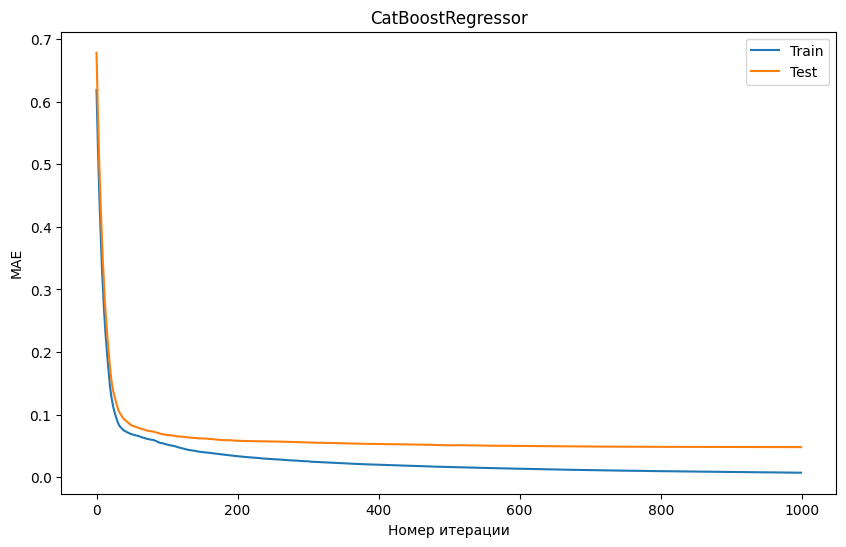

In [257]:
plt.figure(figsize=(10, 6))
plt.plot(model.evals_result_['learn']['MAE'], label='Train')
plt.plot(model.evals_result_['validation']['MAE'], label='Test')
plt.xlabel('Номер итерации')
plt.ylabel('MAE')
plt.title('CatBoostRegressor')
plt.legend()
plt.show()

In [258]:
model = CatBoostRegressor(depth=9, learning_rate=0.01,eval_metric='MAE')
model.fit(X_train, y_train, eval_set=(X_test, y_test))

0:	learn: 0.6672685	test: 0.7286668	best: 0.7286668 (0)	total: 2.99ms	remaining: 2.98s
1:	learn: 0.6622876	test: 0.7234294	best: 0.7234294 (1)	total: 5.12ms	remaining: 2.55s
2:	learn: 0.6575263	test: 0.7186317	best: 0.7186317 (2)	total: 8.04ms	remaining: 2.67s
3:	learn: 0.6523560	test: 0.7133615	best: 0.7133615 (3)	total: 10.8ms	remaining: 2.7s
4:	learn: 0.6470633	test: 0.7080328	best: 0.7080328 (4)	total: 12.7ms	remaining: 2.52s
5:	learn: 0.6419812	test: 0.7028569	best: 0.7028569 (5)	total: 15.7ms	remaining: 2.6s
6:	learn: 0.6369285	test: 0.6976063	best: 0.6976063 (6)	total: 18.6ms	remaining: 2.64s
7:	learn: 0.6320460	test: 0.6923388	best: 0.6923388 (7)	total: 21.4ms	remaining: 2.65s
8:	learn: 0.6271519	test: 0.6872545	best: 0.6872545 (8)	total: 24.3ms	remaining: 2.67s
9:	learn: 0.6219366	test: 0.6818702	best: 0.6818702 (9)	total: 25.2ms	remaining: 2.49s
10:	learn: 0.6170492	test: 0.6768268	best: 0.6768268 (10)	total: 27.9ms	remaining: 2.51s
11:	learn: 0.6122861	test: 0.6716646	best: 

In [259]:
y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')


MAE(train): 0.04525318233392682
MAE(test): 0.07254511944180447


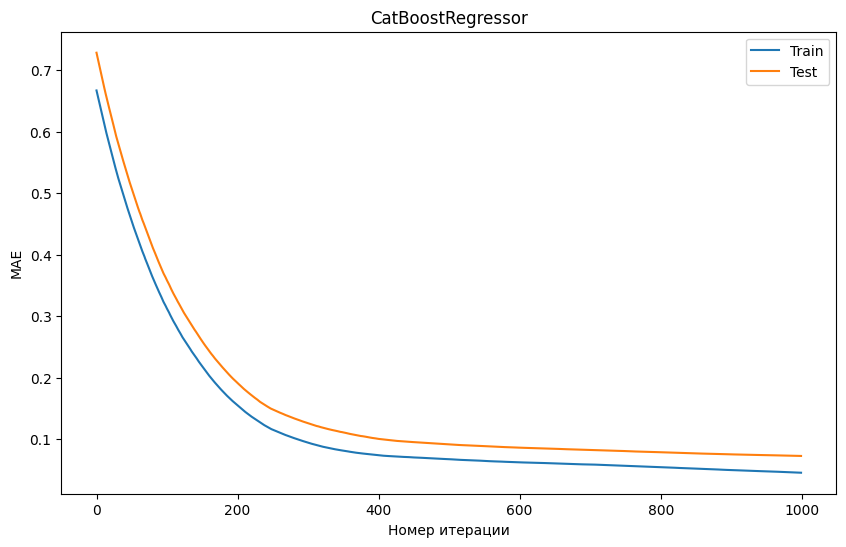

In [260]:
plt.figure(figsize=(10, 6))
plt.plot(model.evals_result_['learn']['MAE'], label='Train')
plt.plot(model.evals_result_['validation']['MAE'], label='Test')
plt.xlabel('Номер итерации')
plt.ylabel('MAE')
plt.title('CatBoostRegressor')
plt.legend()
plt.show()

**Вывод:**

Переобучение(регрессия): Линейная регрессия, SVM, XGB

Переобучение(классификация): Логистическая регрессия

Недообучились: нейросеть с задачей классификация и регрессией(хотя результат неплохой, но можно и лучше)

Регрессия: хорошо показала себя деревья решений и случайный лес(вопрос с графиком, ошибка падала не гладко -> моджет ли это говорить о переобучении?). Хорошо себя показал и CatBoost

Классификация: хорошо показала SVM, деревья решений(с GINI), случайный лес(с энтропией), XGB, CatBoost.